# WL Affinity for SPEC CPU based on EMON SKX - 3D

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pca.pca import *
import pandas as pd

file_name = "post_silicon/skx_executions_emon/summary_e_p.csv"
df_data = pd.read_csv(file_name)
df_data.fillna(0,inplace=True)
display(df_data)

features = list(df_data.columns)[2:]
test_column = list(df_data.columns)[0]


pca_df = get_PCA_3D(df_data,features)

## Explained variance

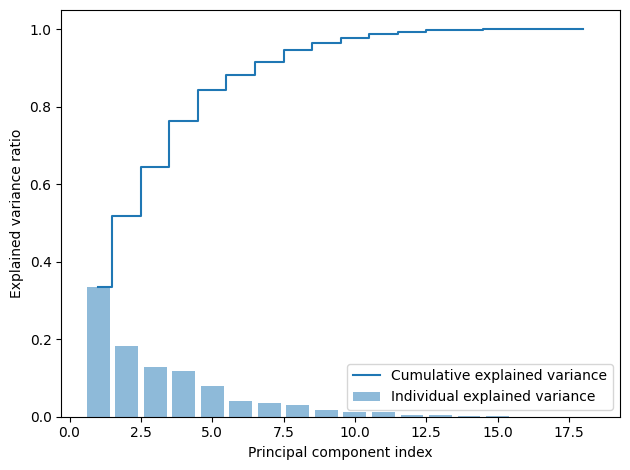

In [9]:
from pca.pca import *
x = get_features(df_data,features)
X_std = StandardScaler().fit_transform(x)
exp_var_pca = get_explained_variance(X_std)
plot_explained_variance(exp_var_pca)

## PCA plot 

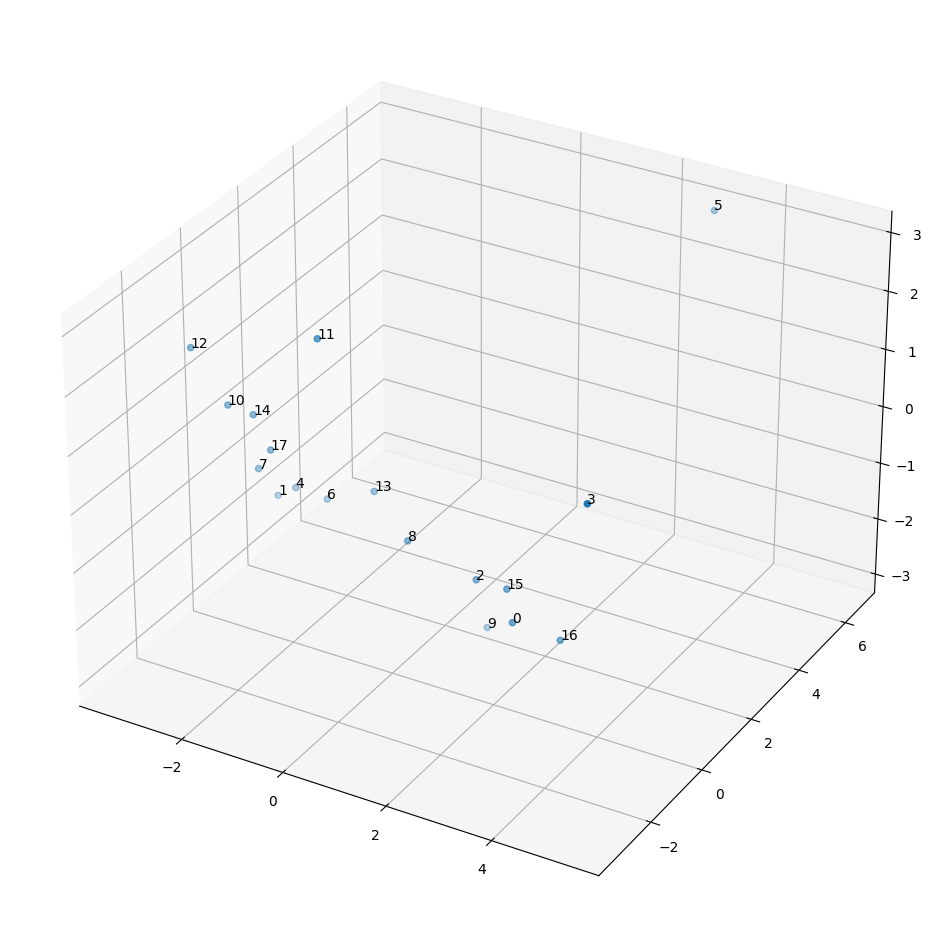

In [18]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_pca['principal component 1'], df_pca['principal component 2'], df_pca['principal component 3'])

for i in range(18):
    ax.text(df_pca['principal component 1'][i],\
              df_pca['principal component 2'][i],\
              df_pca['principal component 3'][i],i)

plt.show()


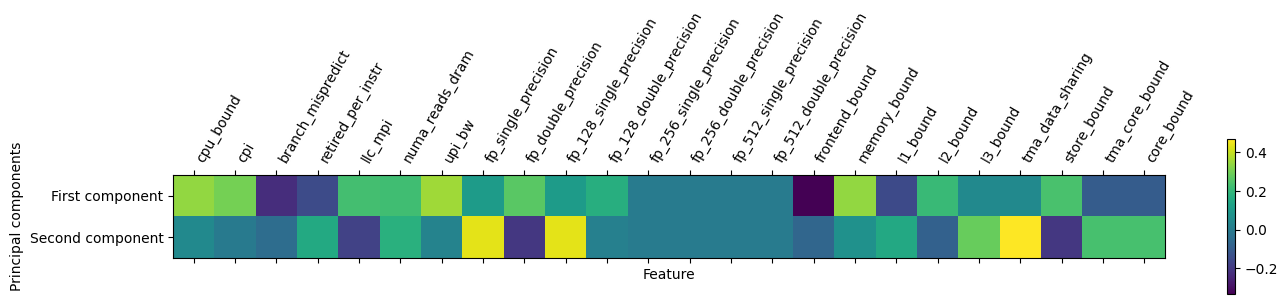

In [20]:
from pca.pca import *
plot_pca_vectors(X_std, features)

## Calculate optimal number of clusters

'Optimal number of clusters = 3'

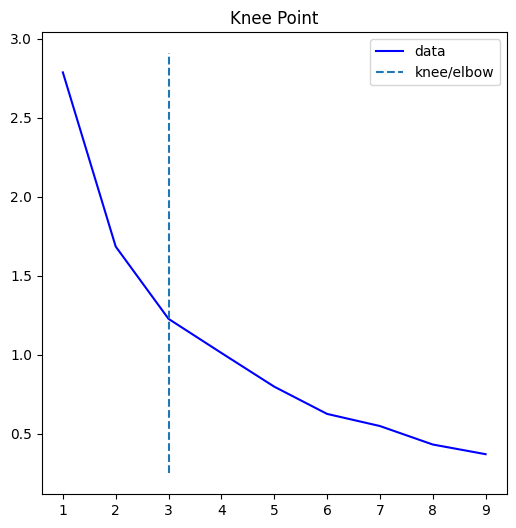

In [21]:
from clustering.distortion import *
from clustering.cluster_score import *
clusters = calculate_elbow(pca_df)[0]
display(f"Optimal number of clusters = {clusters}")

In [23]:
# create a DF based on real known kind
df_clusters_ = df_data[['Kind', 'test_name']].copy()
df_clusters_.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted_ = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters_["principal component 1"] = pca_df_sorted_["principal component 1"].values
df_clusters_["principal component 2"] = pca_df_sorted_["principal component 2"].values
df_clusters_["principal component 3"] = pca_df_sorted_["principal component 3"].values
df_clusters_.rename(columns={'Kind': 'cluster'}, inplace=True)
display(df_clusters_)

,cluster,test_name,principal component 1,principal component 2,principal component 3
0,1,603.bwaves,3.074365,-1.405333,-0.985450
1,1,605.mcf,-2.741034,0.870436,-1.264970
2,0,607.cactuBSSN,1.831045,-0.326890,-1.040974
3,0,619.lbm,5.353051,-3.261415,2.375831
4,0,620.omnetpp,-2.208841,0.574662,-0.870188
5,0,621.wrf,2.964608,6.575880,2.934052
6,0,623.xalancbmk,-1.826856,1.021719,-1.153286
7,0,625.x264,-2.399694,-0.387839,-0.202165
8,0,627.cam4,0.487162,-0.296240,-0.740478
9,0,628.pop2,1.052766,1.598886,-2.914442


## Plot PCA in 3D and clasifications

,cluster,test_name,principal component 1,principal component 2,principal component 3
0,1,603.bwaves,3.074365,-1.405333,-0.985450
1,1,605.mcf,-2.741034,0.870436,-1.264970
2,0,607.cactuBSSN,1.831045,-0.326890,-1.040974
3,0,619.lbm,5.353051,-3.261415,2.375831
4,0,620.omnetpp,-2.208841,0.574662,-0.870188
5,0,621.wrf,2.964608,6.575880,2.934052
6,0,623.xalancbmk,-1.826856,1.021719,-1.153286
7,0,625.x264,-2.399694,-0.387839,-0.202165
8,0,627.cam4,0.487162,-0.296240,-0.740478
9,0,628.pop2,1.052766,1.598886,-2.914442


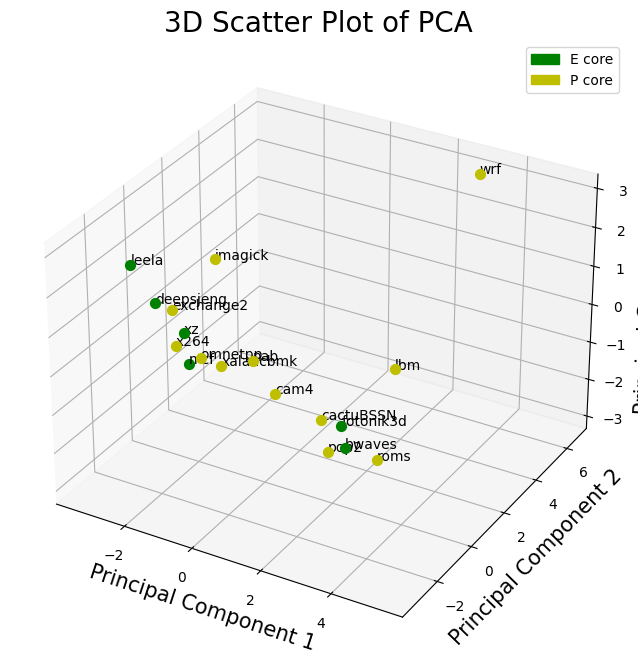

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing Axes3D from mpl_toolkits.mplot3d
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3D Scatter Plot of PCA', fontsize=20)

# Assuming df_clusters_ has columns 'principal component 1', 'principal component 2', 'principal component 3', 'cluster', and 'test_name'

# Assign colors based on cluster values
colors = np.where(df_clusters_["cluster"].astype(int) == 1, 'g', 'y')

# Create legend handles and labels
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(['g', 'y'], ['E core', 'P core'])]
ax.legend(handles=handles, loc='upper right', prop={'size': 10})

# Scatter plot in 3D with annotated points using the second string after "."
for i, label in enumerate(df_clusters_['test_name']):
    label_parts = label.split(".")  # Split the string by "."
    if len(label_parts) > 1:  # Check if there is a second string after "."
        annotation_label = label_parts[1]  # Use the second part as the annotation label
        ax.scatter(df_clusters_['principal component 1'][i], df_clusters_['principal component 2'][i],
                   df_clusters_['principal component 3'][i], c=colors[i], s=50)
        ax.text(df_clusters_['principal component 1'][i], df_clusters_['principal component 2'][i],
                df_clusters_['principal component 3'][i], annotation_label)  # Annotate with the label

# Save DataFrame to CSV file
df_clusters_.to_csv("df_clusters_.csv")

# Display the DataFrame
display(df_clusters_)

plt.show()


## Clasification based on KMEANs


In [12]:
from sklearn.cluster import KMeans
clusters = 4
df = pd.DataFrame([])
df_pca = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2','principal component 3'])
kmeans = KMeans(init="k-means++", n_clusters=clusters).fit(df_pca)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
X_dist = (kmeans.transform(df_pca))

distance = []
for inner_list in X_dist:
    distance.append((min(inner_list)))
        
df['PRED'] = labels
df['test_name'] = df_data['test_name'] 
df['distance'] = distance

df.to_csv("clusters.csv")
display(df.sort_values(by='PRED', ascending=True))


,PRED,test_name,distance
17,0,657.xz,0.597556
1,0,605.mcf,1.991811
14,0,648.exchange2,0.880227
4,0,620.omnetpp,1.392251
13,0,644.nab,1.822392
6,0,623.xalancbmk,1.898249
7,0,625.x264,0.617659
12,0,641.leela,2.131385
11,0,638.imagick,3.100938
10,0,631.deepsjeng,1.134557


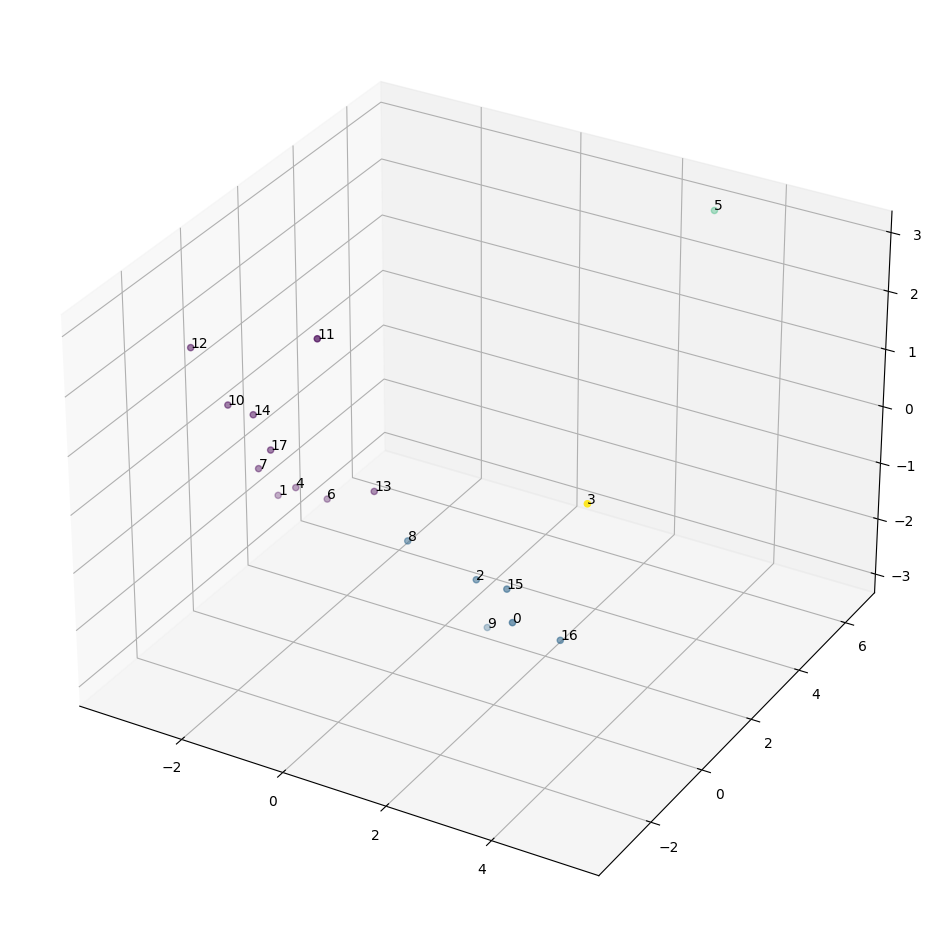

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_pca['principal component 1'], df_pca['principal component 2'], df_pca['principal component 3'],c= kmeans.labels_.astype(float))

for i in range(18):
    ax.text(df_pca['principal component 1'][i],\
              df_pca['principal component 2'][i],\
              df_pca['principal component 3'][i],i)

plt.show()

# Use  model to train KNN ML

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('pca.csv')
df.fillna(0,inplace=True)
# Create feature and target arrays
X = df[["principal component 1","principal component 2","principal component 3"]]

df = pd.read_csv('clusters.csv')
y = df[["PRED"]]

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train.values.ravel())

    # Calculate the accuracy of the model
    print(f'knn.score = {knn.score(X_test, y_test)}')


knn.score = 0.5
knn.score = 0.5
knn.score = 0.5
knn.score = 0.5
knn.score = 0.5
knn.score = 0.5
knn.score = 0.5
knn.score = 0.5
knn.score = 0.5
knn.score = 0.5


# Use  model to train Decision Tree ML

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pca.analytics import *
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

df = pd.read_csv('pca.csv')
df.fillna(0,inplace=True)
# Create feature and target arrays
X = df[["principal component 1","principal component 2","principal component 3"]]

df = pd.read_csv('clusters.csv')
y = df[["PRED"]]

p_total = 0
r_total = 0
f_total = 0
    
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)

#    clf = DecisionTreeClassifier(max_depth=30,criterion='entropy',max_features=0.6,splitter='best')
    clf = DecisionTreeClassifier()

    clf.fit(X_train,y_train)

    # Predict Accuracy Score
    y_pred = clf.predict(X_test)
    
    print("Y pred " + str(y_pred))
    print("Y test " + str(y_test.values.tolist()))
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
    
    p_total += p
    r_total += r
    f_total += f
    
print(f"Precision score {p_total/10}")
print(f"Recall score {r_total/10}")
print(f"F-beta score {f_total/10}")
print()


Y pred [0 0 0 1 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 2 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 2 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 2 1]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 1]
Y test [[0], [0], [0], [3], [1]]
Precision score 0.9363636363636363
Recall score 1.0
F-beta score 0.9575757575757576



# Use  model to train SVM ML 

In [16]:
#Import svm model
from sklearn import svm

p_total = 0
r_total = 0
f_total = 0
    
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)

    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train.values.ravel())

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    print("Y pred " + str(y_pred))
    print("Y test " + str(y_test.values.tolist()))
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
    
    p_total += p
    r_total += r
    f_total += f
    
print(f"Precision score {p_total/10}")
print(f"Recall score {r_total/10}")
print(f"F-beta score {f_total/10}")
print()


Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Y pred [0 0 0 1 0]
Y test [[0], [0], [0], [3], [1]]
Precision score 0.6923076923076924
Recall score 0.9230769230769231
F-beta score 0.7912087912087912

